# Runge-Kutta 

We want to try to solve <b>Initial Value Problems</b> (all the $y_i$ are given at some starting value $x_s$, and it is desired to find the $y_i$'s at some final point $x_f$, or at some discrete list of points)

Runge-Kutta methods propagate a solution over an interval by combining the information from several Euler-style steps (each involving one evaluation of the right-hand f's), and then using the information obtained to match a Taylor series expansion up to some higher order.

Higher order RK methods succeed virtually always; it's usually the fastest method when evaluating $f_i$ is cheap and the accuracy is not ultra-stringent ($\leq 10^{-10}$).

### Constructing the Method

Think of the RK method as an elabortion of the Euler method.

<b><i>How so?</i></b>

Well the Euler method is given by:

\begin{equation}
    y_{i+1} = y_i + \Delta x f(y_i, x_i)
\end{equation}

where $f(y_i, x_i)$ is the derivative $\frac{dy}{dx}$. This method computes the next function value $y_{i+1}$ by using derivative information at the beginning of the interval (i.e. at $y_i$).

<b><i>Why is that so bad?</i></b>

It's not too bad if we're solving fairly simple problems. However, the more complex the problems, the more we need to care about <font color = 'red'>accuracy</font> and <font color = 'red'>error propagation</font>.

<b><i>Cool! But how does the Runge-Kutta method help with these issues?</i></b>

The Runge-Kutta method will involve multiple Euler method steps in between the orginial Euler method step. This means <u><i>one step in the Euler method will take multiple sub-steps in the Runge-Kutta method</i></u>

#### 2nd Order RK Method Visualization

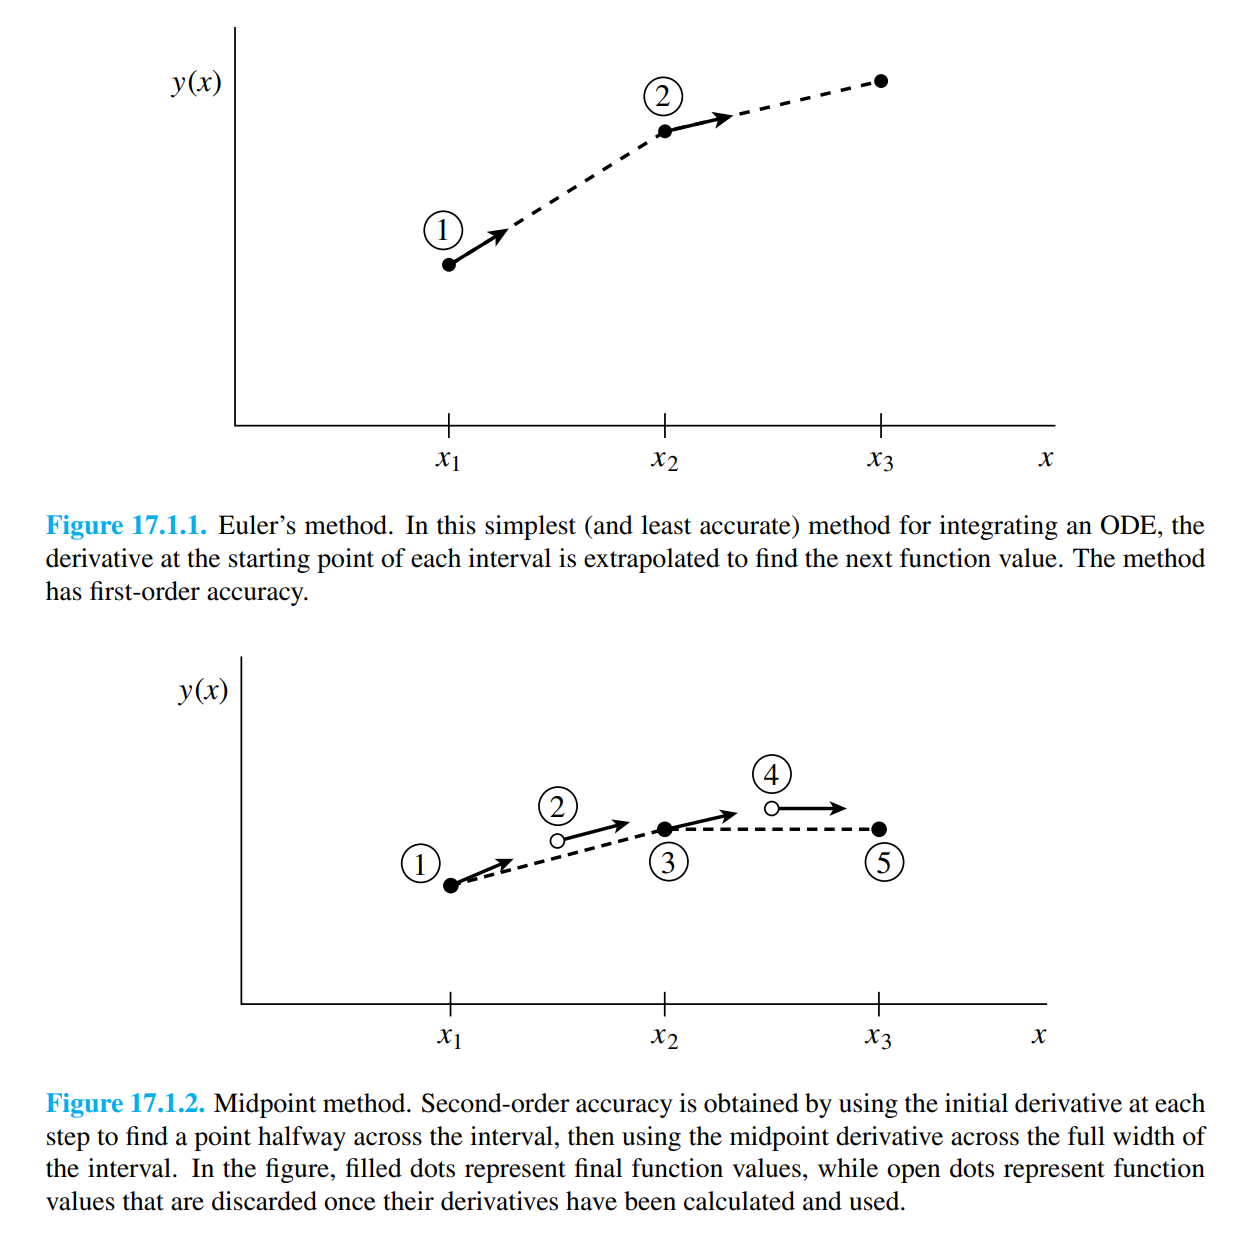

In [1]:
from IPython import display
display.Image("C:\\Users\\dylan\\OneDrive\\Documents\\Coding\\images\\RKvsEuler.png")

Mathematically, we can construct the <b>4th Order Runge-Kutta Method</b> by:

\begin{align*}
y_{i+1} &= y_i + \tfrac{1}{6}k_1 + \tfrac{1}{3}k_2 + \tfrac{1}{3}k_3 + \tfrac{1}{6}k_4 \\
k_1 &= h f(x_i, y_i) \\
k_2 &= h f\left(x_i + \tfrac{1}{2}h, y_i + \tfrac{1}{2}k_1\right) \\
k_3 &= h f\left(x_i + \tfrac{1}{2}h, y_i + \tfrac{1}{2}k_2\right) \\
k_4 &= h f\left(x_i + h, y_i + k_3\right)
\end{align*}

This higher order method has error of $\mathcal{O}(h^5)$

### Programming a Simple Method

Here's code for a 1D RK4 method solving a differential equation

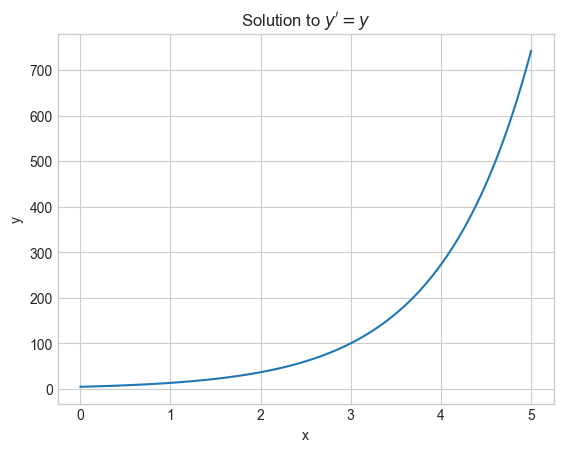

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,y):
    """
    Specifies the ODE to be solved by the RK4 function

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through

    Returns
    -------
    The ODE in question
    """
    return y

def RK4(y0):
    """Calculates the 4th Order Runge-Kutta method
    
    Parameters
    -----------
    y0 : int or float
        The initial condition used to solve for the particular solution of the ODE

    Returns
    -------
    t : NDArray[float64]
        Time values spaced apart by dt

    y : NDArray[float64]
        Function values of the ODE
    """

    #Sets the amount of iterations to complete
    n = 100

    #This is the h (i.e. the time step) in the method
    dt = 0.05

    #Creates the arrays for the function values and the time
    y, t = np.empty([n+1]), np.empty([n+1])

    #Sets the initial condition for the function value
    y[0] = y0

    for i in range(0, n):

        #Solving for the coefficients
        k1 = dt*f(t[i], y[i])
        k2 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k1)
        k3 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k2)
        k4 = dt*f(t[i] + dt, y[i] + k3)

        #Iteraing through the function and time values
        y[i+1] = y[i] + (1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4
        t[i+1] = t[i] + dt

    return t, y

t, y = RK4(5)

plt.style.use('seaborn-v0_8-whitegrid')
plt.title('Solution to $y\' = y$')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(t, y)
plt.show()

### Programming Something more Complex

I wanted to try to code something a bit more general. I wanted a function to be scale-able to n-dim

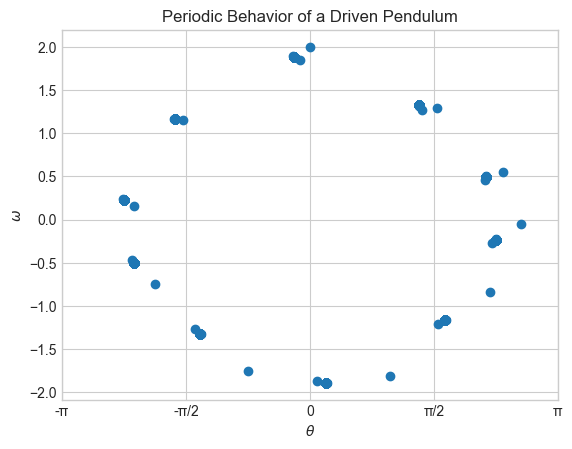

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#These are the First order ODEs that would need to be solved by the Runge-Kutta method

def f(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through

    Returns
    -------
    The velocities of the particular coordinates of interest.
    """

    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size

    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])

    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    ### In this specific example, we have copied the ODE system from Tao Peng about a driven pendulum

    q, b, omega0 = 0.5, 0.85, 2/3

    v[0] = y[1]
    v[1] = -q*y[1] -np.sin(y[0]) + b * np.cos(omega0 * t)

    return v

#Specifies the dimension of the system and the amount of steps 
D = 2
n = 10000

#Initializes the multi-dimensional array for solving the system of ODEs. The first 
y = np.empty(shape = (n+1, D))
t, dt = np.empty([n+1]), (3*np.pi)/10

#Setting the initial conditions of the system
y[0] = [0, 2]

for i in range(0,n):

    #Solving for the coefficients
    k1 = dt*f(t[i], y[i])
    k2 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k1)
    k3 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k2)
    k4 = dt*f(t[i] + dt, y[i] + k3)

    #Iteraing through the function and time values
    y[i+1] = y[i] + (1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4
    t[i+1] = t[i] + dt

#This quickly takes all of the y1 values and puts them into their own array. Same with the y2 values
y1 = y[:,0]
y2 = y[:,1]


plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(y1, y2) 
pi = np.pi
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])
plt.title("Periodic Behavior of a Driven Pendulum")
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.show()

Angle: 0.0
Angular Velocity: 2.0
Angle: 8.06134304532e-312
Angular Velocity: 8.06134301117e-312
Angle: 8.06135764587e-312
Angular Velocity: 8.061357645395e-312
Angle: 8.06135764895e-312
Angular Velocity: 8.061357654406e-312
Angle: 8.061357628083e-312
Angular Velocity: 8.061357622154e-312
Angle: 8.06135764492e-312
Angular Velocity: 8.0613576333e-312
Angle: 8.06135763259e-312
Angular Velocity: 8.06135762903e-312
Angle: 8.061357648003e-312
Angular Velocity: 8.061357643735e-312
Angle: 8.06135763733e-312
Angular Velocity: 8.06135764326e-312
Angle: 8.06135762405e-312
Angular Velocity: 8.06135764729e-312
Angle: 8.06134470396e-312
Angular Velocity: 8.06134471439e-312
Angle: 8.061344690914e-312
Angular Velocity: 8.06134472459e-312
Angle: 8.06134470633e-312
Angular Velocity: 8.061344724116e-312
Angle: 8.06134472388e-312
Angular Velocity: 8.06134471392e-312
Angle: 8.061344693286e-312
Angular Velocity: 8.061344727673e-312
Angle: 8.06134472862e-312
Angular Velocity: 8.06134470277e-312
Angle: 8.0613

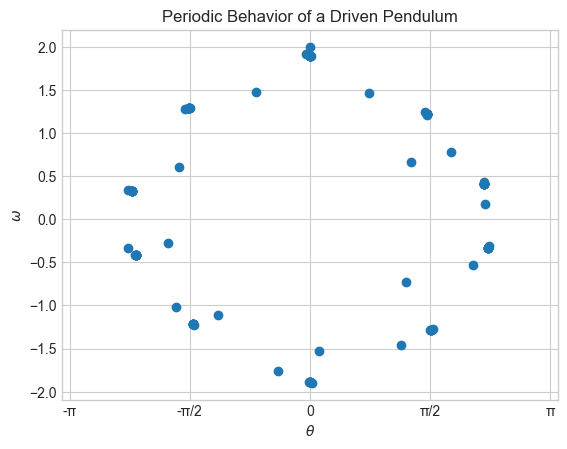

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#These are the First order ODEs that would need to be solved by the Runge-Kutta method

def f(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through

    Returns
    -------
    The velocities of the particular coordinates of interest.
    """

    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size

    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])

    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    ### In this specific example, we have copied the ODE system from Tao Peng about a driven pendulum

    q, b, omega0 = 0.5, 0.85, 2/3

    v[0] = y[1]
    v[1] = -q*y[1] -np.sin(y[0]) + b * np.cos(omega0 * t)

    return v


def multiRK4(y0, D, n):
    """
    This function runs the Runge-Kutta 4th Order method for a D-dimensional system of ODEs

    Parameters
    ----------
    y0: array (of dimension D)
        Initial conditions of the ODEs

    D : int
        Dimension (i.e. the amount of coordinates) needed for the system
    n : int
        Number of steps through time

    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Specifies the dimension of the system and the amount of steps 

    #Initializes the multi-dimensional array for solving the system of ODEs. The first 
    y = np.empty(shape = (n+1, D))
    t, dt = np.empty([n+1]), (3*np.pi)/10

    #Setting the initial conditions of the system
    if len(y0) < 2: 
        print("The dimension of the initial conditions is less than required")
        return
    elif len(y0)  > 2:
        print("The dimension of the initial conditions is more than required")
        return
    else:    
        y[0] = y0

    for i in range(0,n):

        #Solving for the coefficients
        k1 = dt*f(t[i], y[i])
        k2 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k1)
        k3 = dt*f(t[i] + 0.5*dt, y[i] + 0.5*k2)
        k4 = dt*f(t[i] + dt, y[i] + k3)

        #Iteraing through the function and time values
        y[i+1] = y[i] + (1/6)*k1 + (1/3)*k2 + (1/3)*k3 + (1/6)*k4
        t[i+1] = t[i] + dt

        for i in range(0, n, 5):
            print("Angle: " + str(y[i][0]))
            print("Angular Velocity: " + str(y[i][1]))

    return y.transpose()

#This quickly takes all of the y1 values and puts them into their own array. Same with the y2 values

r = multiRK4([0, 2], 2, 100)

y1 = r[0]
y2 = r[1]

plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(y1, y2) 
pi = np.pi
plt.xticks(np.arange(-pi, pi+pi/2, step=(pi/2)), ['-π','-π/2','0','π/2','π'])
plt.xlim(-pi-0.1, pi+0.1)
plt.title("Periodic Behavior of a Driven Pendulum")
plt.xlabel("$\\theta$")
plt.ylabel("$\omega$")
plt.show()